# read & clean consumption files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Consumption1 = pd.read_csv("/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_001.csv")
Consumption2 = pd.read_csv("/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_002.csv")
Consumption3 = pd.read_csv("/content/drive/MyDrive/Data/Final Project/Sites Energy Consumption Part_003.csv")

# merge files
Consumption_data = pd.concat([Consumption1, Consumption2, Consumption3], ignore_index=True)
Consumption_data.to_csv("Consumption_data.csv", index=False)

Consumption_data

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,"00:00:00 13,01,01",0.219,A,A
1,MAC000002,"00:30:00 13,01,01",0.241,A,A
2,MAC000002,"01:00:00 13,01,01",0.191,A,A
3,MAC000002,"01:30:00 13,01,01",0.235,A,A
4,MAC000002,"02:00:00 13,01,01",0.182,A,A
...,...,...,...,...,...
1380247,MAC000100,"18:30:00 13,20,12",0.260,N,B
1380248,MAC000100,"19:00:00 13,20,12",0.267,N,B
1380249,MAC000100,"19:30:00 13,20,12",0.274,N,B
1380250,MAC000100,"20:00:00 13,20,12",0.312,N,B


In [3]:
Consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380252 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cell_id                  1380252 non-null  object 
 1   DateTime                 1380252 non-null  object 
 2   KWH/hh (per half hour)   1380252 non-null  float64
 3   site_id                  1380252 non-null  object 
 4   region                   1380252 non-null  object 
dtypes: float64(1), object(4)
memory usage: 52.7+ MB


In [4]:
# transforamtion of variables
Consumption_data['DateTime'] = pd.to_datetime(Consumption_data['DateTime'], errors='coerce', format='%H:%M:%S %y,%d,%m')
Consumption_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380252 entries, 0 to 1380251
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   cell_id                  1380252 non-null  object        
 1   DateTime                 1380252 non-null  datetime64[ns]
 2   KWH/hh (per half hour)   1380252 non-null  float64       
 3   site_id                  1380252 non-null  object        
 4   region                   1380252 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 52.7+ MB


In [5]:
# check missing values
Consumption_data.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [6]:
missing_percentage = (Consumption_data['DateTime'].isnull().sum() / len(Consumption_data)) * 100
print(f"Missing DateTime: {missing_percentage:.2f}%")

Missing DateTime: 0.00%


In [7]:
#replace missining values
Consumption_data['DateTime'] = Consumption_data.groupby('cell_id')['DateTime'].fillna(method='ffill')
Consumption_data['DateTime'] = Consumption_data.groupby('cell_id')['DateTime'].fillna(method='bfill')

#After handel missing values
Consumption_data.isnull().sum()

<ipython-input-7-1179153941e6>:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  Consumption_data['DateTime'] = Consumption_data.groupby('cell_id')['DateTime'].fillna(method='ffill')
<ipython-input-7-1179153941e6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Consumption_data['DateTime'] = Consumption_data.groupby('cell_id')['DateTime'].fillna(method='ffill')
<ipython-input-7-1179153941e6>:3: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  Consumption_data['DateTime'] = Consumption_data.groupby('cell_id')['DateTime'].fillna(method='b

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0


In [8]:
# check outliers
#print(Consumption_data.columns)
Consumption_data["KWH/hh (per half hour) "].describe()

,KWH/hh (per half hour)
count,1.380252e+06
mean,2.423353e-01
std,6.765435e+00
min,0.000000e+00
25%,6.500000e-02
50%,1.360000e-01
75%,2.650000e-01
max,7.657000e+03


In [9]:
Q1 = Consumption_data['KWH/hh (per half hour) '].quantile(0.25)
Q3 = Consumption_data['KWH/hh (per half hour) '].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

outliers = Consumption_data[(Consumption_data['KWH/hh (per half hour) '] < lower_bound) |
                (Consumption_data['KWH/hh (per half hour) '] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Lower Bound: -0.23500000000000004, Upper Bound: 0.5650000000000001
Number of Outliers: 120288


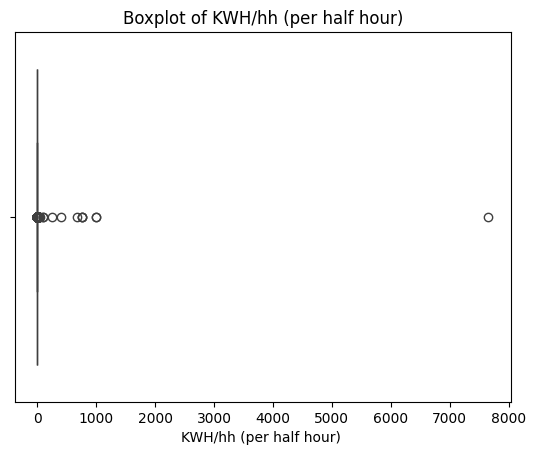

In [10]:
sns.boxplot(x=Consumption_data['KWH/hh (per half hour) '])
plt.title("Boxplot of KWH/hh (per half hour)")
plt.show()

In [11]:
# Handle outliers
#Consumption_data['KWH/hh (per half hour) '] = Consumption_data['KWH/hh (per half hour) '].clip(lower=lower_bound, upper=upper_bound)

#after handling outlier
#Consumption_data['KWH/hh (per half hour) '].describe()

In [12]:
#check duplicats
Consumption_data.duplicated().sum()

942

In [13]:
#after remove duplictes
Consumption_data.drop_duplicates(inplace=True)
Consumption_data

,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
1380247,MAC000100,2013-12-20 18:30:00,0.260,N,B
1380248,MAC000100,2013-12-20 19:00:00,0.267,N,B
1380249,MAC000100,2013-12-20 19:30:00,0.274,N,B
1380250,MAC000100,2013-12-20 20:00:00,0.312,N,B


In [14]:
# Extract features from DateTimecoulmn
'Hour', 'Day', 'Month', 'Weekday', 'Year'
Consumption_data['Hour'] = Consumption_data['DateTime'].dt.hour
Consumption_data['Weekday'] = Consumption_data['DateTime'].dt.day_name()
Consumption_data['Day'] = Consumption_data['DateTime'].dt.day
Consumption_data['Month'] = Consumption_data['DateTime'].dt.month
Consumption_data['Year'] = Consumption_data['DateTime'].dt.year


# Calculate hourly mean consumption
hourly_consumption = Consumption_data.groupby(['site_id', 'Hour'])['KWH/hh (per half hour) '].mean().reset_index()

Consumption_data = Consumption_data.merge(hourly_consumption,
                                          on=['site_id', 'Hour'],
                                          how='left',
                                          suffixes=('', '_hourly_mean'))

# Columns to drop
columns_to_drop = ['day_of_week', 'month', 'hour', 'Season', 'LaggedDemand']

# Drop the columns
Consumption_data = Consumption_data.drop(columns=columns_to_drop, errors='ignore')

# Save or inspect the modified data
Consumption_data.to_csv('sheet1_data_cleaned.csv', index=False)
Consumption_data.head()


,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Hour,Weekday,Day,Month,Year,KWH/hh (per half hour) _hourly_mean
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0,Tuesday,1,1,2013,0.292001
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,0,Tuesday,1,1,2013,0.292001
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,1,Tuesday,1,1,2013,0.265175
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,1,Tuesday,1,1,2013,0.265175
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,2,Tuesday,1,1,2013,0.251485


In [15]:
# after handel outliers
#sns.boxplot(x=Consumption_data['KWH/hh (per half hour) '])
#plt.title("Boxplot of KWH/hh (per half hour)")
#plt.show()

In [16]:
# Save Consumption_data to a CSV file
file_name = "Consumption_data.csv"
Consumption_data.to_csv(file_name, index=False)

# Download the file
from google.colab import files
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# read demand file

In [17]:
file_path = '/content/drive/MyDrive/Data/Final Project/Demand.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
data.sheet_names


['Sheet1', 'Sheet2', 'Sheet3']

In [18]:
# Load and preview the first sheet
Demand_data = data.parse('Sheet1')

Demand_data


,DemandDateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


In [19]:
Demand_data.info()

# Check inconsistencies
Demand_data['Demand'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DemandDateTime  17520 non-null  datetime64[ns]
 1   Demand          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


array(['Normal', 'Low', 'Normall', 'High', 'normal', 'high'], dtype=object)

In [20]:
# Standardize the 'Demand' column by correcting inconsistent values
cleaning_map = {
    'Normal': 'Normal',
    'Normall': 'Normal',
    'normal': 'Normal',
    'Low': 'Low',
    'High': 'High',
    'high': 'High'
}
Demand_data['Demand'] = Demand_data['Demand'].map(cleaning_map)

# Verify the cleaning process
Demand_data['Demand'].unique()


array(['Normal', 'Low', 'High'], dtype=object)

In [21]:
# Convert Demand to numeric values based on provided cost-per-kWh
demand_cost_map = {'High': 77.21, 'Normal': 19.46, 'Low': 6.89}
Demand_data['Demand_Cost'] = Demand_data['Demand'].map(demand_cost_map)
Demand_data

,DemandDateTime,Demand,Demand_Cost
0,2013-01-01 00:00:00,Normal,19.46
1,2013-01-01 00:30:00,Normal,19.46
2,2013-01-01 01:00:00,Normal,19.46
3,2013-01-01 01:30:00,Normal,19.46
4,2013-01-01 02:00:00,Normal,19.46
...,...,...,...
17515,2013-12-31 21:30:00,Normal,19.46
17516,2013-12-31 22:00:00,Normal,19.46
17517,2013-12-31 22:30:00,Normal,19.46
17518,2013-12-31 23:00:00,Normal,19.46


In [22]:
# check missing values
Demand_data.isnull().sum()

,0
DemandDateTime,0
Demand,0
Demand_Cost,0


In [23]:
Demand_data.duplicated().sum()

0

In [24]:
# Feature Engineering
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

def determine_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


# Add new features
  #  on=['DateTime', 'Hour', 'Day', 'Month', 'Weekday', 'Year'],

Demand_data['Hour'] = Demand_data['DemandDateTime'].dt.hour
Demand_data['Day'] = Demand_data['DemandDateTime'].dt.day_name()
Demand_data['Month'] = Demand_data['DemandDateTime'].dt.month
Demand_data['Season'] = Demand_data['Month'].apply(determine_season)
Demand_data['Weekday'] = Demand_data['DemandDateTime'].dt.day_name()
Demand_data['Year'] = Demand_data['DemandDateTime'].dt.year



# Columns to drop
columns_to_drop = ['HourOfDay', 'TimeOfDay', 'DayOfWeek', 'IsWeekend', 'Season', 'LaggedDemand']

# Drop the columns
sheet1_data = Demand_data.drop(columns=columns_to_drop, errors='ignore')

# Save or inspect the modified data
sheet1_data.to_csv('sheet1_data_cleaned.csv', index=False)
sheet1_data.head()

,DemandDateTime,Demand,Demand_Cost,Hour,Day,Month,Weekday,Year
0,2013-01-01 00:00:00,Normal,19.46,0,Tuesday,1,Tuesday,2013
1,2013-01-01 00:30:00,Normal,19.46,0,Tuesday,1,Tuesday,2013
2,2013-01-01 01:00:00,Normal,19.46,1,Tuesday,1,Tuesday,2013
3,2013-01-01 01:30:00,Normal,19.46,1,Tuesday,1,Tuesday,2013
4,2013-01-01 02:00:00,Normal,19.46,2,Tuesday,1,Tuesday,2013


In [25]:
# Save Consumption_data to a CSV file
file_name = "sheet1_data.csv"
Demand_data.to_csv(file_name, index=False)

# Download the file to your PC
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Merge Data

In [26]:
#Consumption_data.columns
Demand_data.rename(columns={'DemandDateTime': 'DateTime'}, inplace=True)
Demand_data.columns

Index(['DateTime', 'Demand', 'Demand_Cost', 'Hour', 'Day', 'Month', 'Season',
       'Weekday', 'Year'],
      dtype='object')

In [27]:
# Selecting relevant columns and merging
# Ensure 'Day' columns have the same data type before merging
# Here, we'll convert 'Day' in Consumption_data to the day of the week name

Consumption_data['Day'] = pd.to_datetime(Consumption_data['DateTime']).dt.day_name() # Convert to day of the week name

MergedData = pd.merge(
    Consumption_data[['cell_id', 'DateTime', 'KWH/hh (per half hour) ', 'site_id', 'region',
       'Hour', 'Weekday', 'Month', 'Year','Day',
       'KWH/hh (per half hour) _hourly_mean']],

    Demand_data[['DateTime', 'Demand', 'Demand_Cost', 'Hour', 'Day', 'Month',
       'Season', 'Weekday','Year']],
    on=['DateTime', 'Hour', 'Day', 'Month', 'Weekday','Year'],
    how='inner'
)

MergedData

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Hour,Weekday,Month,Year,Day,KWH/hh (per half hour) _hourly_mean,Demand,Demand_Cost,Season
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,2,Tuesday,1,2013,Tuesday,0.251485,Normal,19.46,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000100,2013-12-20 18:30:00,0.260,N,B,18,Friday,12,2013,Friday,0.358768,Normal,19.46,Winter
1379306,MAC000100,2013-12-20 19:00:00,0.267,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter
1379307,MAC000100,2013-12-20 19:30:00,0.274,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter
1379308,MAC000100,2013-12-20 20:00:00,0.312,N,B,20,Friday,12,2013,Friday,0.314112,Normal,19.46,Winter


In [28]:
# Save Consumption_data to a CSV file
file_name = "MergedData.csv"
MergedData.to_csv(file_name, index=False)

# Download the file to your PC
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Handel Outliers & Some Visualization

In [29]:
MergedData.describe()

,DateTime,KWH/hh (per half hour),Hour,Month,Year,KWH/hh (per half hour) _hourly_mean,Demand_Cost
count,1379310,1.379310e+06,1.379310e+06,1.379310e+06,1379310.0,1.379310e+06,1.379310e+06
mean,2013-06-29 15:26:27.981817088,2.423348e-01,1.149976e+01,6.433293e+00,2013.0,2.423348e-01,2.086561e+01
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,2013.0,5.688950e-02,6.890000e+00
25%,2013-03-30 12:30:00,6.500000e-02,5.000000e+00,3.000000e+00,2013.0,1.659183e-01,1.946000e+01
50%,2013-06-28 12:00:00,1.360000e-01,1.100000e+01,6.000000e+00,2013.0,2.222308e-01,1.946000e+01
75%,2013-09-27 15:00:00,2.650000e-01,1.800000e+01,9.000000e+00,2013.0,2.786059e-01,1.946000e+01
max,2013-12-31 23:30:00,7.657000e+03,2.300000e+01,1.200000e+01,2013.0,9.001307e-01,7.721000e+01
std,NaN,6.767733e+00,6.922352e+00,3.437178e+00,0.0,1.204218e-01,1.275203e+01


<Axes: xlabel='KWH/hh (per half hour) '>

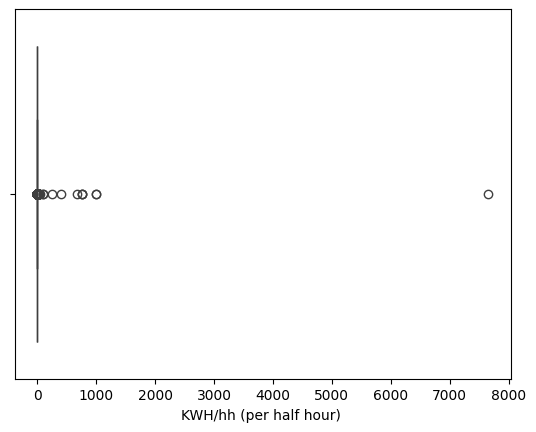

In [30]:
# show outliers in boxplot
sns.boxplot(data=MergedData['KWH/hh (per half hour) '],orient='h' )

In [31]:
import numpy as np
# Calculate IQR Anomaly Detection Values
q1 = np.quantile(MergedData['KWH/hh (per half hour) '], 0.25)
q3 = np.quantile(MergedData['KWH/hh (per half hour) '], 0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'lower limit = {lower_bound} and upper limit = {upper_bound}')

MergedData['AD_KWH/hh (per half hour) '] = np.where((MergedData['KWH/hh (per half hour) '] < lower_bound) | (MergedData['KWH/hh (per half hour) '] > upper_bound), 1, 0)

lower limit = -0.23500000000000004 and upper limit = 0.5650000000000001


In [32]:
MergedData['AD_KWH/hh (per half hour) '].value_counts()

,count
AD_KWH/hh (per half hour),
0,1259093
1,120217


In [33]:
! pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=9438098ef6be737194a46d2275175259ffbd8623ce686791141ef62f2d9ed89c
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [34]:
from pyod.models.mad import MAD

# Column needs to be checked
data = MergedData['KWH/hh (per half hour) ']
data = data.values.reshape(-1,1)

# Initiate the Model
mad_detector = MAD(threshold = 3.5)

# fitting the model
mad_detector.fit(data)

MergedData['MAD_Library_Label']= mad_detector.labels_
MergedData['MAD_Scores'] = mad_detector.decision_scores_

MergedData

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Hour,Weekday,Month,Year,Day,KWH/hh (per half hour) _hourly_mean,Demand,Demand_Cost,Season,AD_KWH/hh (per half hour),MAD_Library_Label,MAD_Scores
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter,0,0,0.666470
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter,0,0,0.843125
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter,0,0,0.441637
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter,0,0,0.794946
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,2,Tuesday,1,2013,Tuesday,0.251485,Normal,19.46,Winter,0,0,0.369369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000100,2013-12-20 18:30:00,0.260,N,B,18,Friday,12,2013,Friday,0.358768,Normal,19.46,Winter,0,0,0.995690
1379306,MAC000100,2013-12-20 19:00:00,0.267,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter,0,0,1.051899
1379307,MAC000100,2013-12-20 19:30:00,0.274,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter,0,0,1.108107
1379308,MAC000100,2013-12-20 20:00:00,0.312,N,B,20,Friday,12,2013,Friday,0.314112,Normal,19.46,Winter,0,0,1.413238


In [35]:
MergedData[MergedData['MAD_Library_Label']==1]

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Hour,Weekday,Month,Year,Day,KWH/hh (per half hour) _hourly_mean,Demand,Demand_Cost,Season,AD_KWH/hh (per half hour),MAD_Library_Label,MAD_Scores
24,MAC000002,2013-01-01 12:00:00,0.794,A,A,12,Tuesday,1,2013,Tuesday,0.381705,Normal,19.46,Winter,1,1,5.283583
40,MAC000002,2013-01-01 20:00:00,0.886,A,A,20,Tuesday,1,2013,Tuesday,0.559929,Normal,19.46,Winter,1,1,6.022321
41,MAC000002,2013-01-01 20:30:00,0.573,A,A,20,Tuesday,1,2013,Tuesday,0.559929,Normal,19.46,Winter,1,1,3.509006
69,MAC000002,2013-01-02 10:30:00,0.651,A,A,10,Wednesday,1,2013,Wednesday,0.420938,Normal,19.46,Winter,1,1,4.135327
80,MAC000002,2013-01-02 16:00:00,1.078,A,A,16,Wednesday,1,2013,Wednesday,0.390349,Normal,19.46,Winter,1,1,7.564035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379260,MAC000100,2013-12-19 20:00:00,0.852,N,B,20,Thursday,12,2013,Thursday,0.314112,Low,6.89,Winter,1,1,5.749310
1379284,MAC000100,2013-12-20 08:00:00,1.652,N,B,8,Friday,12,2013,Friday,0.257500,Normal,19.46,Winter,1,1,12.173119
1379285,MAC000100,2013-12-20 08:30:00,1.053,N,B,8,Friday,12,2013,Friday,0.257500,Normal,19.46,Winter,1,1,7.363292
1379296,MAC000100,2013-12-20 14:00:00,0.678,N,B,14,Friday,12,2013,Friday,0.229420,Normal,19.46,Winter,1,1,4.352131


In [36]:
# Imputation
MergedData['New_Imputed_KWH/hh'] = np.where(MergedData['MAD_Library_Label'] == 1, np.median(MergedData['KWH/hh (per half hour) ']), MergedData['KWH/hh (per half hour) '])
MergedData

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Hour,Weekday,Month,Year,Day,KWH/hh (per half hour) _hourly_mean,Demand,Demand_Cost,Season,AD_KWH/hh (per half hour),MAD_Library_Label,MAD_Scores,New_Imputed_KWH/hh
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter,0,0,0.666470,0.219
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,0,Tuesday,1,2013,Tuesday,0.292001,Normal,19.46,Winter,0,0,0.843125,0.241
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter,0,0,0.441637,0.191
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,1,Tuesday,1,2013,Tuesday,0.265175,Normal,19.46,Winter,0,0,0.794946,0.235
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,2,Tuesday,1,2013,Tuesday,0.251485,Normal,19.46,Winter,0,0,0.369369,0.182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379305,MAC000100,2013-12-20 18:30:00,0.260,N,B,18,Friday,12,2013,Friday,0.358768,Normal,19.46,Winter,0,0,0.995690,0.260
1379306,MAC000100,2013-12-20 19:00:00,0.267,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter,0,0,1.051899,0.267
1379307,MAC000100,2013-12-20 19:30:00,0.274,N,B,19,Friday,12,2013,Friday,0.337095,Normal,19.46,Winter,0,0,1.108107,0.274
1379308,MAC000100,2013-12-20 20:00:00,0.312,N,B,20,Friday,12,2013,Friday,0.314112,Normal,19.46,Winter,0,0,1.413238,0.312


<Axes: xlabel='New_Imputed_KWH/hh'>

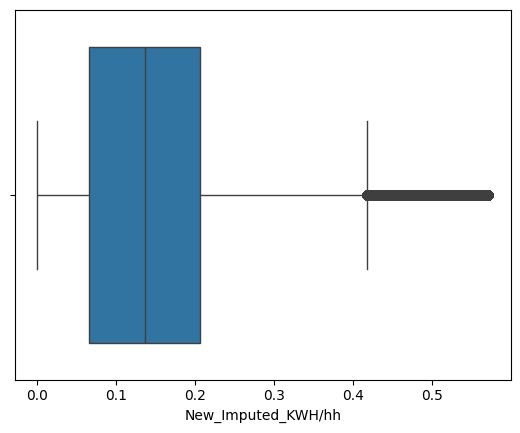

In [37]:
#After handling outliers
sns.boxplot(data=MergedData['New_Imputed_KWH/hh'],orient='h' )

<ipython-input-38-76205db9374d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MergedData, x='region', y='New_Imputed_KWH/hh', palette='Set2')


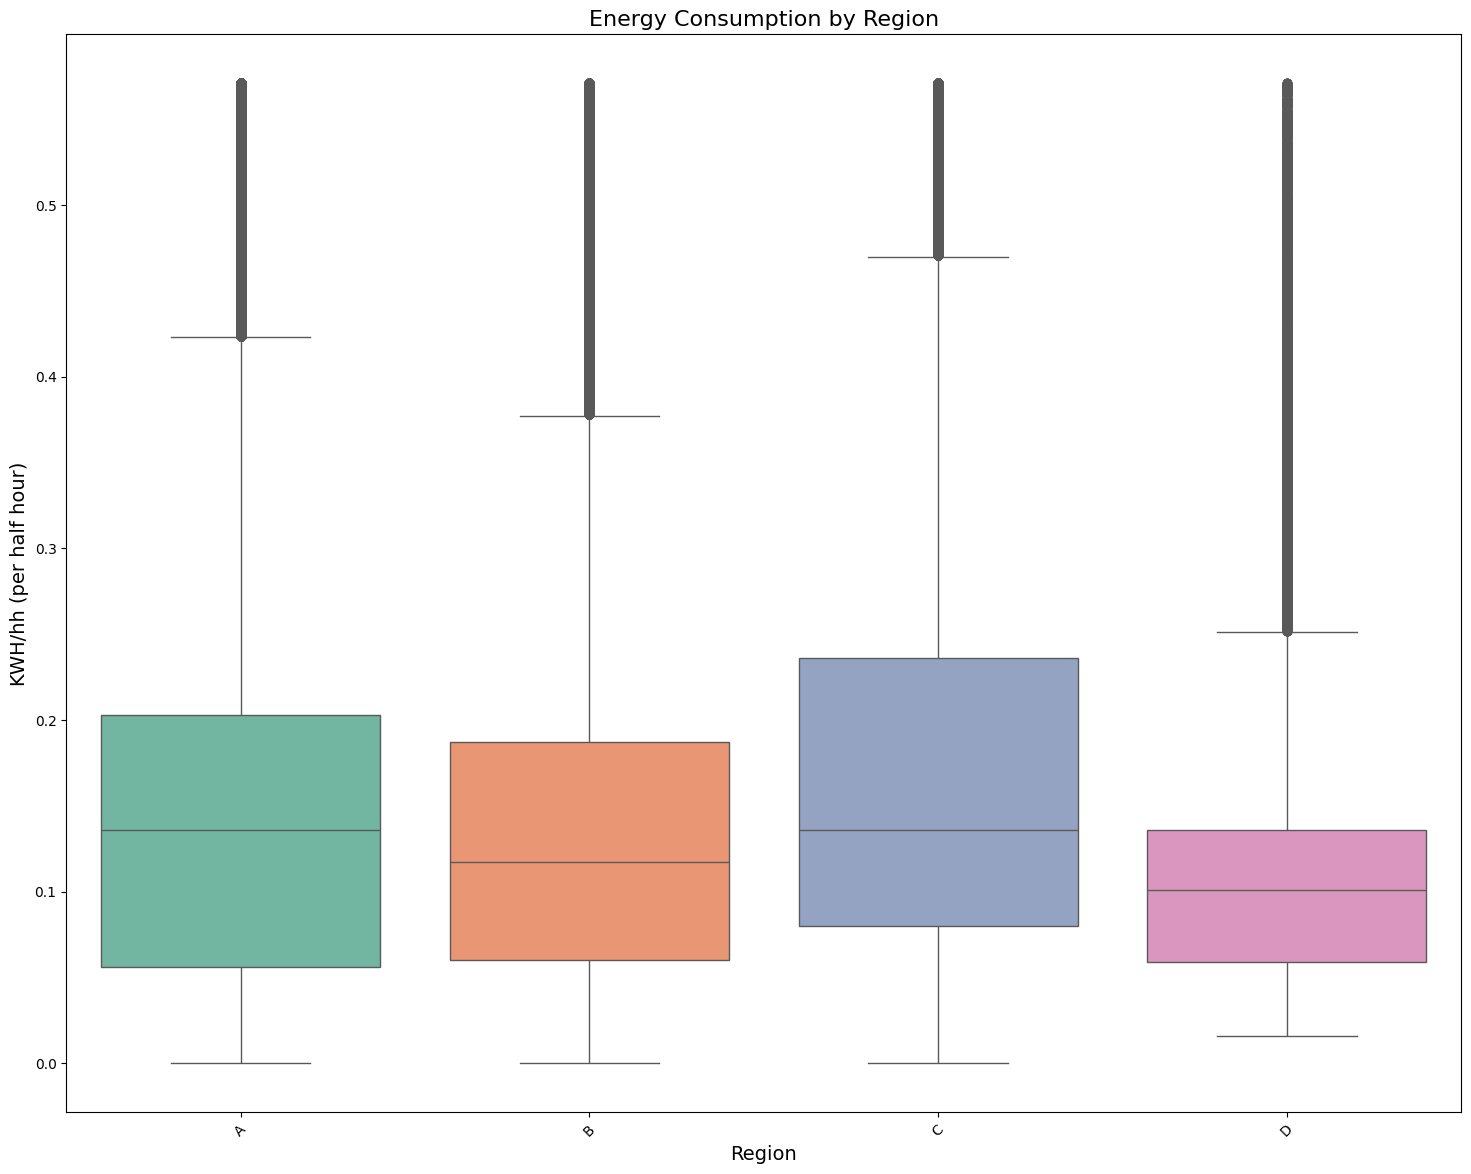

In [38]:
#Box plot of energy consumption by region
plt.figure(figsize=(18, 14))
sns.boxplot(data=MergedData, x='region', y='New_Imputed_KWH/hh', palette='Set2')
plt.title('Energy Consumption by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('KWH/hh (per half hour)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

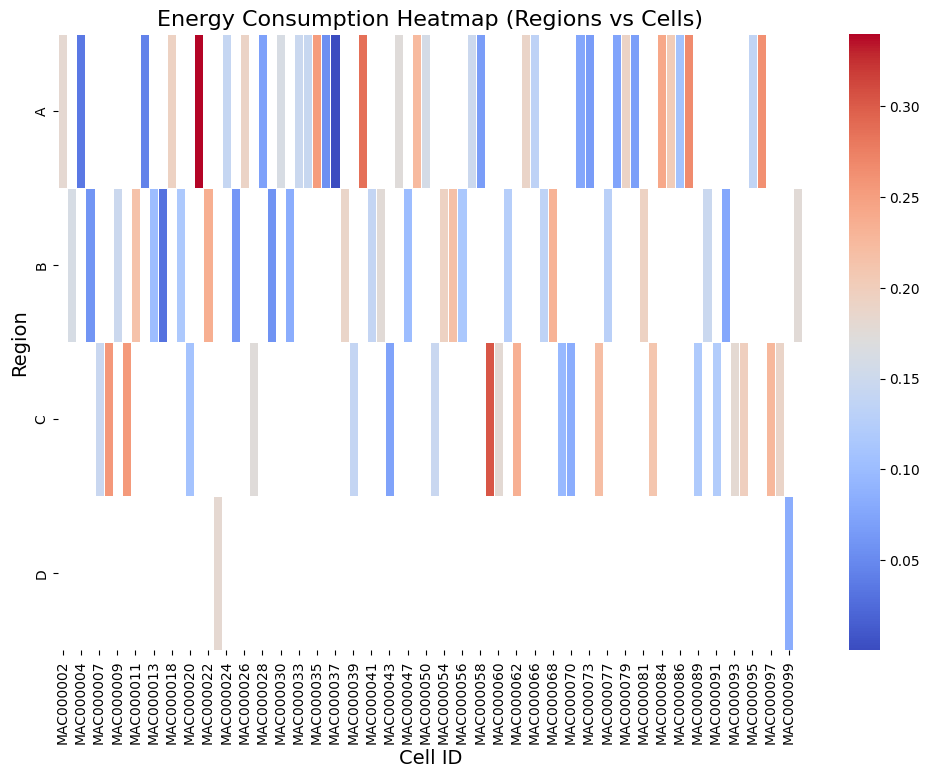

In [39]:
#Heatmap of energy consumption across sites and cells
pivot_table = MergedData.pivot_table(values='New_Imputed_KWH/hh', index='region', columns='cell_id', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linewidths=0.5)
plt.title('Energy Consumption Heatmap (Regions vs Cells)', fontsize=16)
plt.xlabel('Cell ID', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.show()

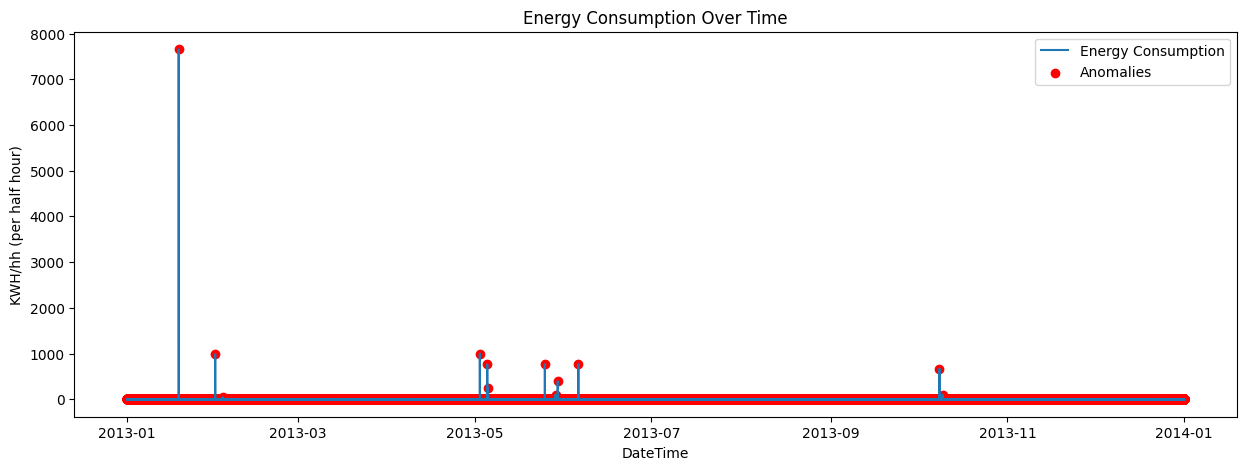

In [40]:
# Plot time series
plt.figure(figsize=(15, 5))
plt.plot(MergedData['DateTime'], MergedData['KWH/hh (per half hour) '], label='Energy Consumption')
plt.scatter(
    MergedData.loc[MergedData['MAD_Library_Label'] == 1, 'DateTime'],
    MergedData.loc[MergedData['MAD_Library_Label'] == 1, 'KWH/hh (per half hour) '],
    color='red',
    label='Anomalies'
)
plt.title('Energy Consumption Over Time')
plt.xlabel('DateTime')
plt.ylabel('KWH/hh (per half hour)')
plt.legend()
plt.show()

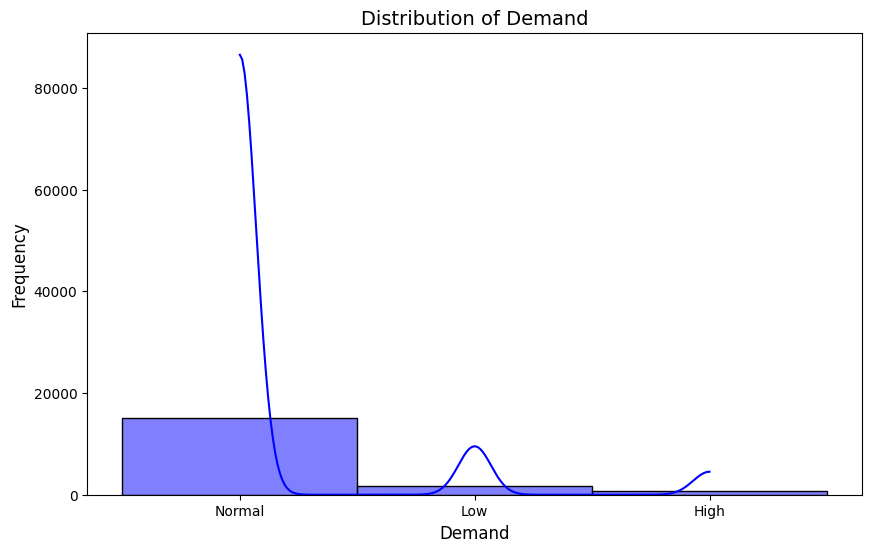

In [41]:
#H Distribution of Demand
plt.figure(figsize=(10, 6))
sns.histplot(Demand_data['Demand'], bins=50, kde=True, color='blue')
plt.title('Distribution of Demand', fontsize=14)
plt.xlabel('Demand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

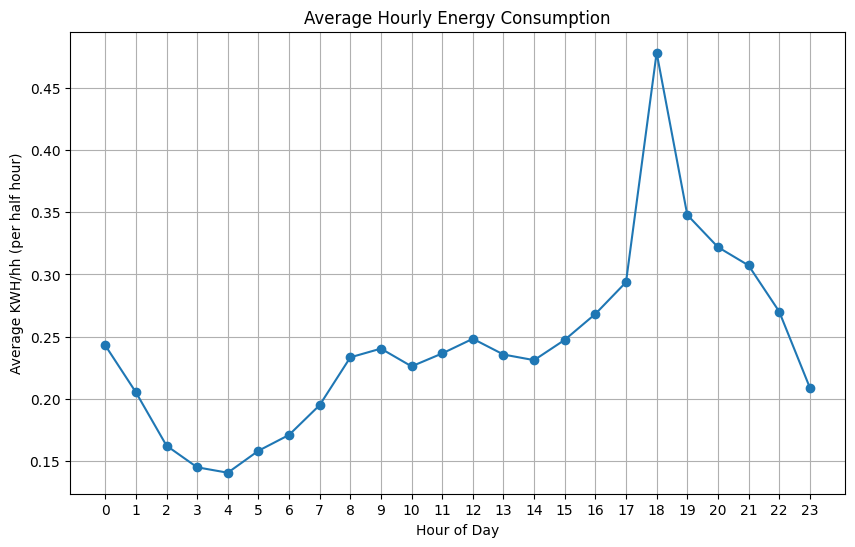

In [42]:
#Hourly Pattern Analysis
hourly_avg = MergedData.groupby('Hour')['KWH/hh (per half hour) '].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg, marker='o')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average KWH/hh (per half hour)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


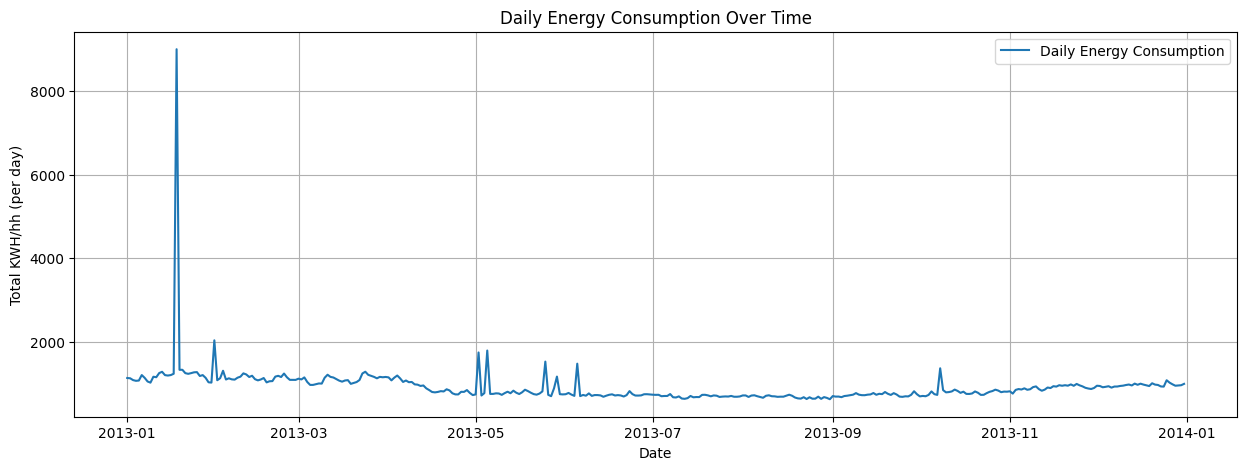

In [43]:
#  Daily Energy Consumption Trend
daily_consumption = MergedData.groupby(MergedData['DateTime'].dt.date)['KWH/hh (per half hour) '].sum()
plt.figure(figsize=(15, 5))
plt.plot(daily_consumption, label='Daily Energy Consumption')
plt.title('Daily Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total KWH/hh (per day)')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-44-a28bdd7e126a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_consumption.index, y=weekly_consumption.values, palette="viridis")


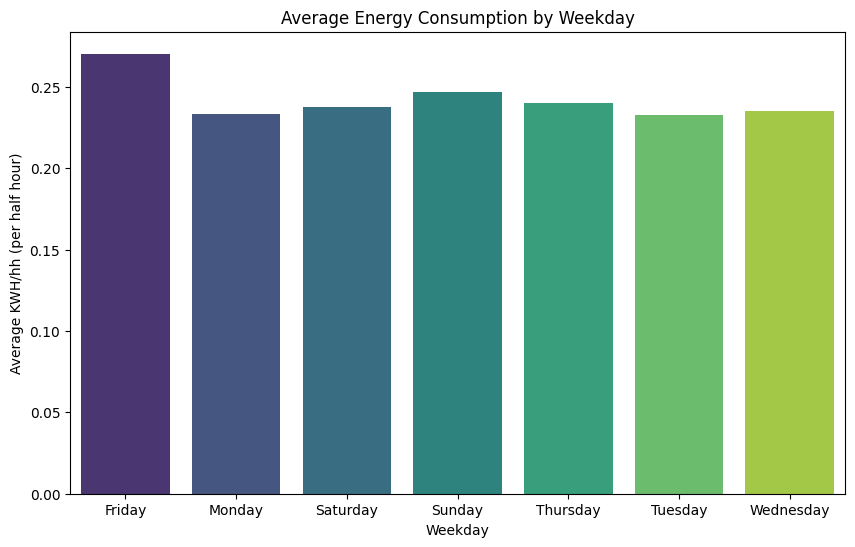

In [44]:
weekly_consumption = MergedData.groupby('Weekday')['KWH/hh (per half hour) '].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_consumption.index, y=weekly_consumption.values, palette="viridis")
plt.title('Average Energy Consumption by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average KWH/hh (per half hour)')
plt.show()


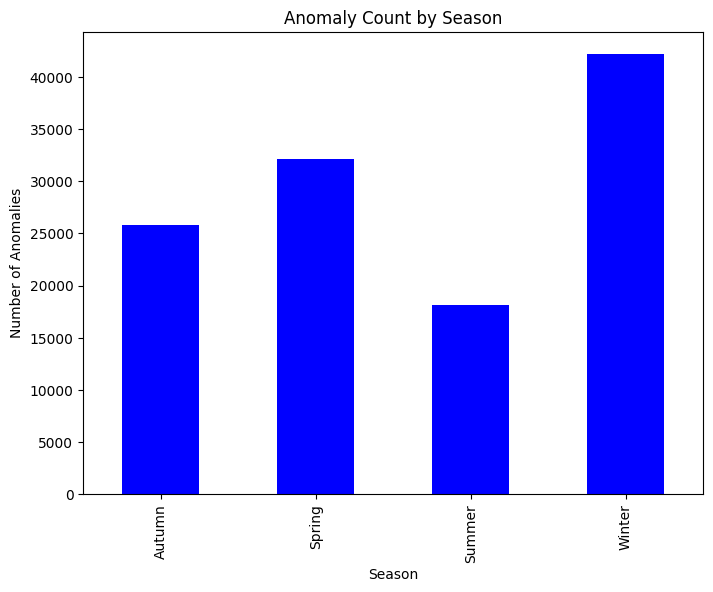

In [45]:
#season analysis
seasonal_anomalies = MergedData[MergedData['MAD_Library_Label'] == 1].groupby('Season').size()
plt.figure(figsize=(8, 6))
seasonal_anomalies.plot(kind='bar', color='blue')
plt.title('Anomaly Count by Season')
plt.xlabel('Season')
plt.ylabel('Number of Anomalies')
plt.show()


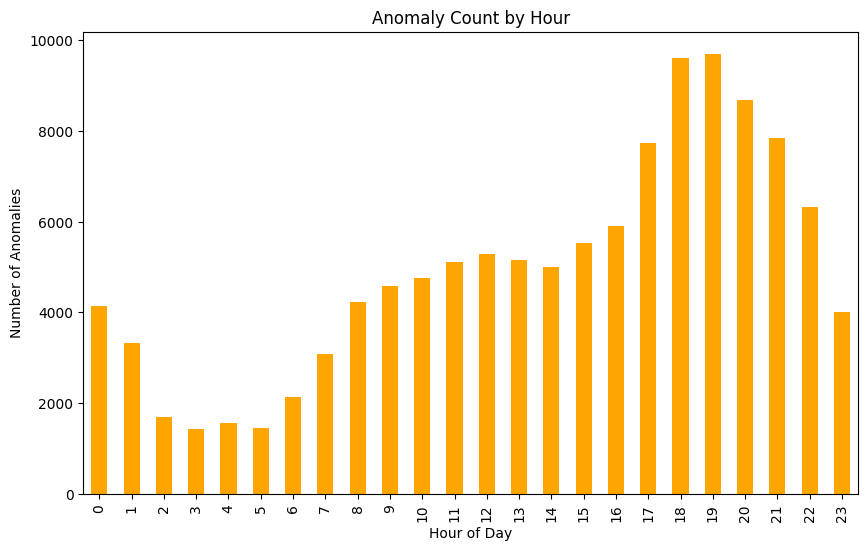

In [46]:
hourly_anomalies = MergedData[MergedData['MAD_Library_Label'] == 1].groupby('Hour').size()
plt.figure(figsize=(10, 6))
hourly_anomalies.plot(kind='bar', color='orange')
plt.title('Anomaly Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Anomalies')
plt.show()


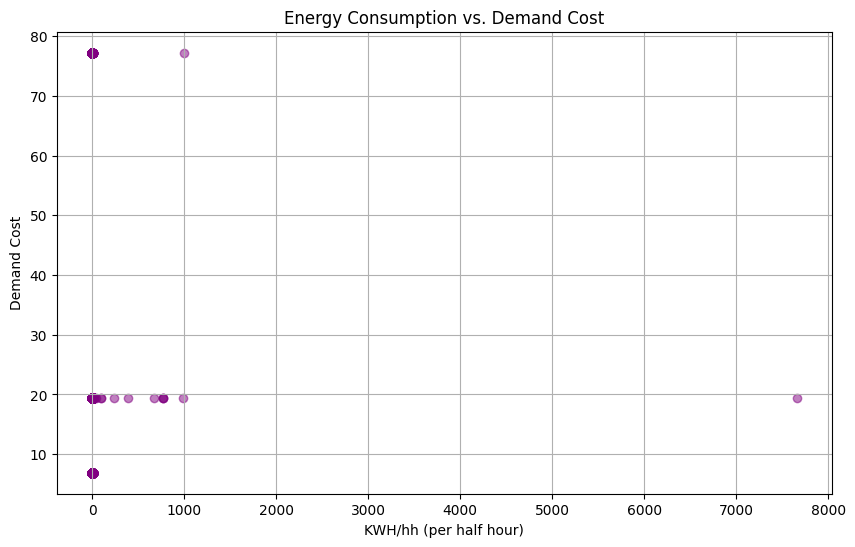

In [47]:
#energy Consumption vs Demand Cost
plt.figure(figsize=(10, 6))
plt.scatter(MergedData['KWH/hh (per half hour) '], MergedData['Demand_Cost'], alpha=0.5, color='purple')
plt.title('Energy Consumption vs. Demand Cost')
plt.xlabel('KWH/hh (per half hour)')
plt.ylabel('Demand Cost')
plt.grid(True)
plt.show()

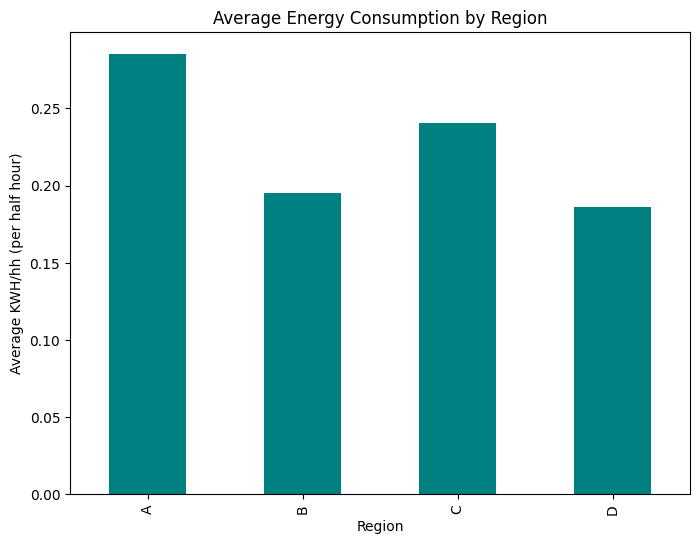

In [48]:
region_consumption = MergedData.groupby('region')['KWH/hh (per half hour) '].mean()
plt.figure(figsize=(8, 6))
region_consumption.plot(kind='bar', color='teal')
plt.title('Average Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Average KWH/hh (per half hour)')
plt.show()


<Figure size 1500x800 with 0 Axes>

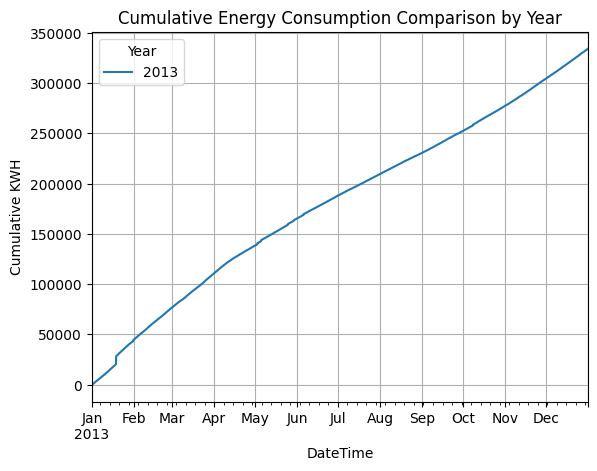

In [49]:
yearly_cumulative = MergedData.groupby(['Year', 'DateTime'])['KWH/hh (per half hour) '].sum().groupby(level=0).cumsum().unstack(0)
plt.figure(figsize=(15, 8))
yearly_cumulative.plot()
plt.title('Cumulative Energy Consumption Comparison by Year')
plt.xlabel('DateTime')
plt.ylabel('Cumulative KWH')
plt.legend(title='Year')
plt.grid(True)
plt.show()

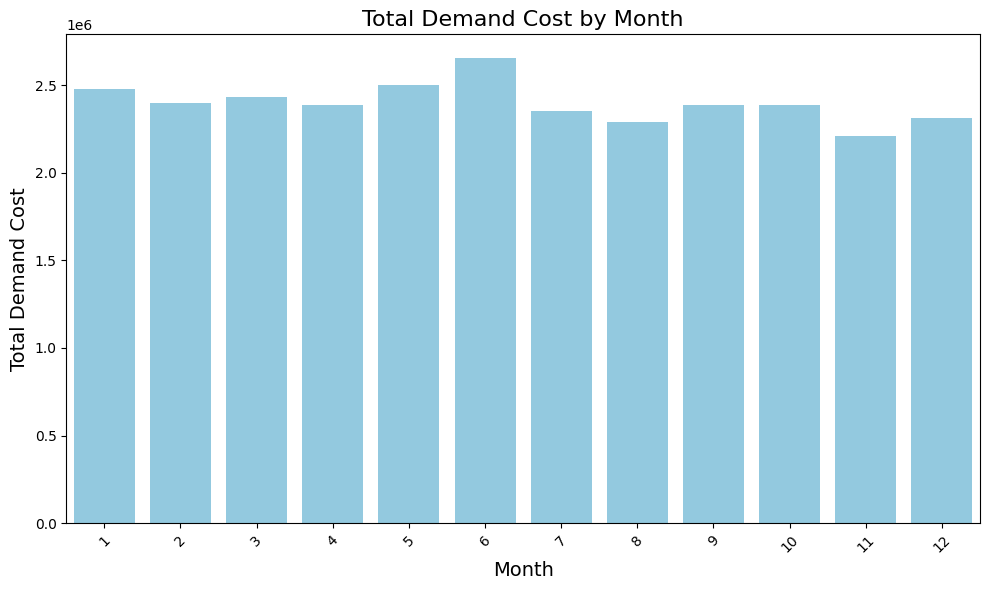

In [50]:
# Group data by month and calculate the total demand cost for each month
monthly_demand_cost = MergedData.groupby('Month')['Demand_Cost'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_demand_cost, x='Month', y='Demand_Cost', color='skyblue')
plt.title('Total Demand Cost by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Demand Cost', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#According to these plots, here are some insights :
1-Region A has more machines than other regions which make it the highest consumption region, we may conclude that population is high in this region

2-Most demand prices are in the normal range

3-June is the highest month in consumption

4-Friday is the highest energy consumption day in the week

# Test Hypothseis

*   H0: region does not affect energy consumption

*   HA: region affect energy consumption

In [51]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.4 MB/s eta 0:00:00


<ipython-input-52-c4cefab5a952>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MergedData['New_Imputed_KWH/hh'])


<Axes: xlabel='New_Imputed_KWH/hh', ylabel='Density'>

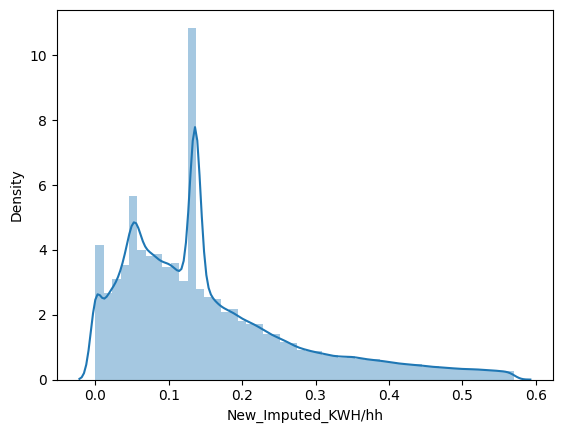

In [52]:
sns.distplot(MergedData['New_Imputed_KWH/hh'])

In [53]:
import pingouin as pg

# Apply ANOVA Test
pg.anova(data = MergedData, dv = 'New_Imputed_KWH/hh', between = 'region')

,Source,ddof1,ddof2,F,p-unc,np2
0,region,3,1379306,4570.458525,0.0,0.009843


Since the p-value is less than the significance level α = 0.05.

reject the null hypothesis (H₀).

Region significantly affects energy consumption.



*   H0 : The proportion of demand in the normal price range is the same as in other price ranges
*   HA : The proportion of demand in the normal price range is significantly higher than in other price ranges




<ipython-input-54-139b00daff24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MergedData['Demand_Cost'])


<Axes: xlabel='Demand_Cost', ylabel='Density'>

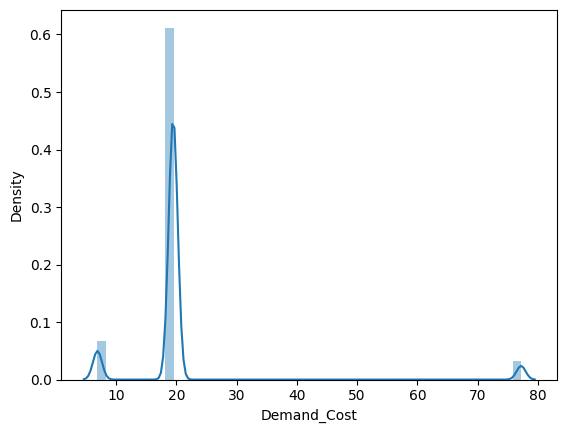

In [54]:
sns.distplot(MergedData['Demand_Cost'])

In [55]:
# Apply ANOVA Test
anova_results = pg.anova(data=MergedData, dv='Demand_Cost', between='Demand')
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,Demand,2,1379307,2.071402e+35,0.0,1.0


Since the p-value is less than the significance level α = 0.05.

 reject the null hypothesis (H₀).

 The proportion of demand in the normal price range is significantly higher than in other price ranges.

*  H0 : Month does not affect energy consumption

*  HA : Month affect energy consumption


In [56]:
# Apply ANOVA Test
pg.anova(data = MergedData, dv = 'New_Imputed_KWH/hh', between = 'Month')

,Source,ddof1,ddof2,F,p-unc,np2
0,Month,11,1379298,834.651734,0.0,0.006612


Since the p-value is less than the significance level α = 0.05.

 reject the null hypothesis (H₀).

 Month affect energy consumption.

# Threshold Recommendation

In [57]:
# Count the number of rows where demand is categorized as 'Low' and calculate the percentage
low_demand_count = MergedData[MergedData['Demand'] == 'Low'].shape[0]
total_rows = len(MergedData)
low_demand_percentage = (low_demand_count / total_rows) * 100

threshold = MergedData['New_Imputed_KWH/hh'].quantile(q=low_demand_percentage / 100)
low_consumption_cells = MergedData.loc[MergedData['New_Imputed_KWH/hh'] < threshold]

# Identify rows with consumption below the threshold
total_savings_kWh = low_consumption_cells['New_Imputed_KWH/hh'].sum()

# Define the cost per kWh in EGP
price_per_kWh = 6.89 / 100

# Compute the total savings in EGP based on identified low consumption rows
total_savings_EGP = total_savings_kWh * price_per_kWh


print(f"Recommended Threshold: {threshold:.2f} kWh")
print(f"Total Energy Savings: {total_savings_kWh:.2f} kWh")
print(f"Total Savings in EGP: {total_savings_EGP:.2f} EGP")

Recommended Threshold: 0.03 kWh
Total Energy Savings: 1429.70 kWh
Total Savings in EGP: 98.51 EGP


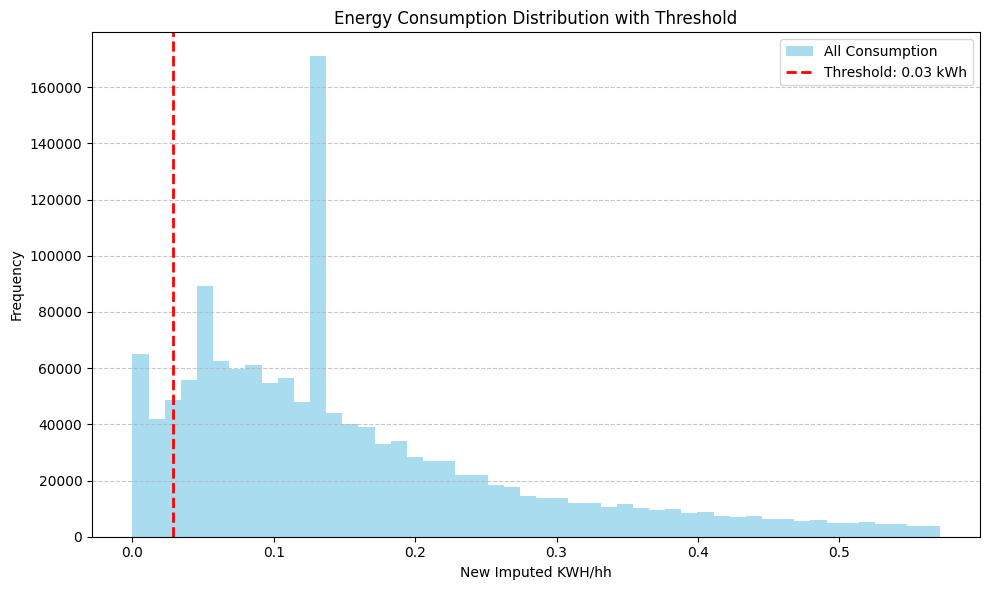

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(MergedData['New_Imputed_KWH/hh'], bins=50, color='skyblue', alpha=0.7, label='All Consumption')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.2f} kWh')
plt.title('Energy Consumption Distribution with Threshold')
plt.xlabel('New Imputed KWH/hh')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-59-9419ccb7299b>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


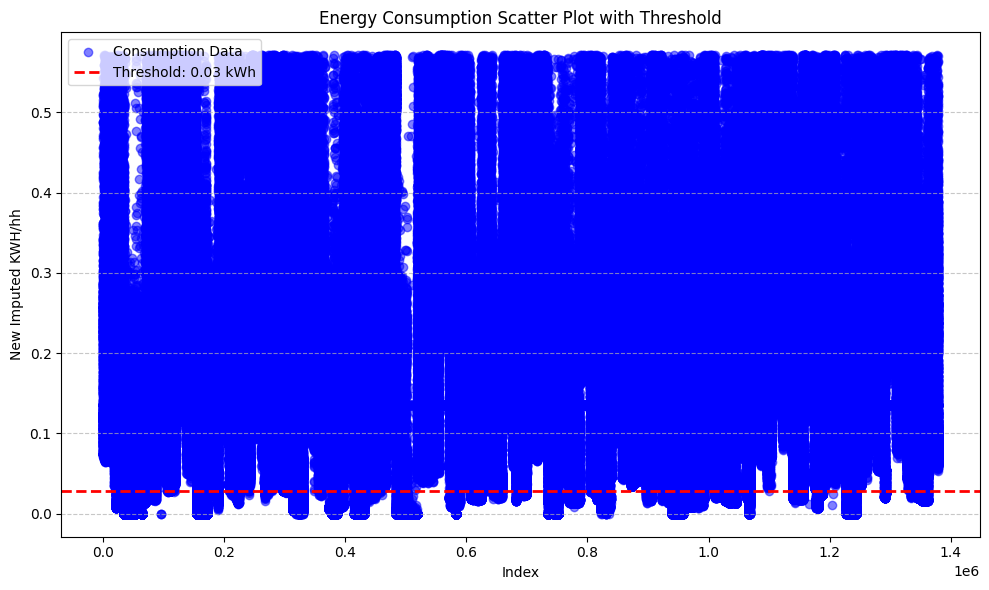

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(MergedData)), MergedData['New_Imputed_KWH/hh'], color='blue', alpha=0.5, label='Consumption Data')
plt.axhline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.2f} kWh')
plt.title('Energy Consumption Scatter Plot with Threshold')
plt.xlabel('Index')
plt.ylabel('New Imputed KWH/hh')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Dash Board

In [60]:
! pip install dash plotly dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [61]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Aggregate data for visualizations
hourly_usage = MergedData.groupby(['Hour'])['New_Imputed_KWH/hh'].mean().reset_index()
daily_usage = MergedData.groupby(['Day'])['New_Imputed_KWH/hh'].mean().reset_index()
monthly_usage = MergedData.groupby(['Month'])['New_Imputed_KWH/hh'].mean().reset_index()
regional_usage = MergedData.groupby(['region'])['New_Imputed_KWH/hh'].sum().reset_index()
cost_analysis = MergedData.groupby(['DateTime'])['Demand_Cost'].sum().reset_index()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Enhanced Energy Usage Dashboard", style={'textAlign': 'center'}),

    dcc.Tabs([
        dcc.Tab(label='Usage Trends', children=[
            html.Div([
                html.Label("Select Date Range:"),
                dcc.RangeSlider(
                    id='date-slider',
                    min=0,
                    max=len(cost_analysis) - 1,
                    step=1,
                    marks={i: str(cost_analysis['DateTime'][i].date()) for i in range(0, len(cost_analysis), 30)},
                    value=[0, len(cost_analysis) - 1]
                )
            ], style={'marginBottom': 20}),
            dcc.Graph(id='trends-chart')
        ]),

       dcc.Tab(label='Regional Analysis', children=[
            dcc.Graph(
                id='regional-chart',
                figure=px.sunburst(regional_usage, path=['region'], values='New_Imputed_KWH/hh',
                                   title="Regional Energy Usage", height=600)
            )
        ]),

        dcc.Tab(label='Detailed Heatmap', children=[
            dcc.Graph(
                id='heatmap-chart',
                figure=px.density_heatmap(MergedData, x='Hour', y='Day', z='New_Imputed_KWH/hh',
                                          title="Energy Usage Heatmap", nbinsx=24, nbinsy=7, color_continuous_scale='Viridis')
            )
        ]),

        dcc.Tab(label='Cost Analysis', children=[
            html.Div([
                html.Label("Select Region:"),
                dcc.Dropdown(
                    id='region-dropdown',
                    options=[{'label': region, 'value': region} for region in regional_usage['region'].unique()],
                    value=regional_usage['region'].unique()[0],
                    style={'width': '50%'}
                )
            ], style={'marginBottom': 20}),
            dcc.Graph(id='cost-chart')
        ])
    ])
])

# Callbacks for interactive updates
@app.callback(
    Output('trends-chart', 'figure'),
    [Input('date-slider', 'value')]
)
def update_trends_chart(date_range):
    filtered_data = cost_analysis.iloc[date_range[0]:date_range[1] + 1]
    return px.line(filtered_data, x='DateTime', y='Demand_Cost', title="Energy Demand Cost Over Time")

@app.callback(
    Output('cost-chart', 'figure'),
    [Input('region-dropdown', 'value')]
)
def update_cost_chart(selected_region):
    region_data = MergedData[MergedData['region'] == selected_region].groupby(['DateTime'])['Demand_Cost'].sum().reset_index()
    return px.bar(region_data, x='DateTime', y='Demand_Cost', title=f"Demand Cost in {selected_region} Over Time")

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>